In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from IPython.display import Image

In [2]:
face_cascade = cv.CascadeClassifier(r'C:\Users\Lenovo\Desktop\DRIVE_DROWSINESS\model_cascad\haarcascade_frontalface_alt.xml')
left_eye_cascade = cv.CascadeClassifier(r'C:\Users\Lenovo\Desktop\DRIVE_DROWSINESS\model_cascad\haarcascade_lefteye_2splits.xml')
right_eye_cascade = cv.CascadeClassifier(r'C:\Users\Lenovo\Desktop\DRIVE_DROWSINESS\model_cascad\haarcascade_righteye_2splits.xml')

In [3]:
model = load_model(r"C:\Users\Lenovo\Desktop\DRIVE_DROWSINESS\model VGG\VggNet.keras")

In [4]:
def prepare_image(image):
    img_resized = cv.resize(image, (64, 64))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)
    return img_expanded

In [8]:
image_path = r"C:\Users\Lenovo\Desktop\DRIVE_DROWSINESS\model_cascad\2.jpg"
image = cv.imread(image_path)

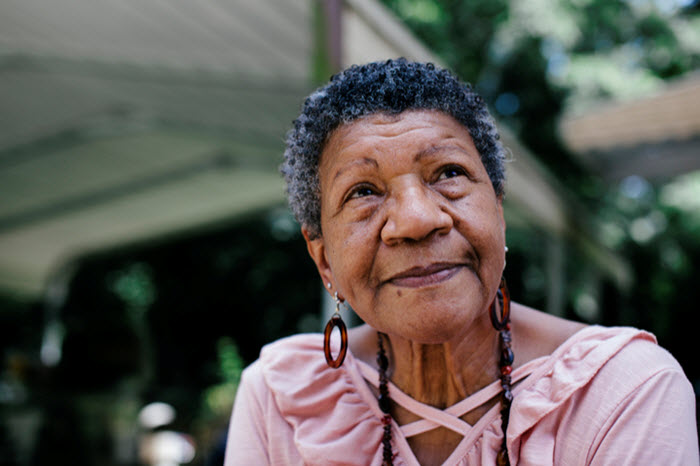

In [9]:
Image(filename=r"C:\Users\Lenovo\Desktop\DRIVE_DROWSINESS\model_cascad\2.jpg", width=300,height=200)

In [10]:
# Charger une nouvelle copie de l'image d'origine pour éviter d'accumuler des cadres
image = cv.imread(image_path)
if image is None:
    print(f"Erreur : Impossible de lire l'image depuis {image_path}")
else:
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    result_general = None
    left_prediction = None
    right_prediction = None

    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(25, 25))
    for (x, y, w, h) in faces:
        # Dessiner un rectangle autour du visage
        cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray_image[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]

        # Détection et traitement de l'œil gauche
        left_eye = left_eye_cascade.detectMultiScale(roi_gray)
        for (lx, ly, lw, lh) in left_eye:
            l_eye = roi_color[ly:ly + lh, lx:lx + lw]
            preprocessed_eye = prepare_image(l_eye)
            left_prediction = model.predict(preprocessed_eye)[0][0]
            color = (0, 255, 0) if left_prediction > 0.8 else (0, 0, 255)
            cv.rectangle(roi_color, (lx, ly), (lx + lw, ly + lh), color, 2)
            break

        # Détection et traitement de l'œil droit
        right_eye = right_eye_cascade.detectMultiScale(roi_gray)
        for (rx, ry, rw, rh) in right_eye:
            r_eye = roi_color[ry:ry + rh, rx:rx + rw]
            preprocessed_eye = prepare_image(r_eye)
            right_prediction = model.predict(preprocessed_eye)[0][0]
            color = (0, 255, 0) if right_prediction > 0.8 else (0, 0, 255)
            cv.rectangle(roi_color, (rx, ry), (rx + rw, ry + rh), color, 2)
            break

    # Combiner les prédictions pour le résultat général
    if left_prediction is not None and right_prediction is not None:
        if left_prediction > 0.8 and right_prediction > 0.8:
            result_general = "Open EYES"
            color_general = (0, 255, 0)  # Vert
        elif left_prediction <= 0.8 and right_prediction <= 0.8:
            result_general = "Close EYES"
            color_general = (0, 0, 255)  # Rouge
        else:
            result_general = "HAHA"
            color_general = (0, 255, 255)  # Jaune

        # Afficher le résultat général
        cv.putText(image, result_general, (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, color_general, 2)

# Afficher ou sauvegarder les résultats
try:
    cv.imshow("Eye State Detection", image)
    cv.waitKey(0)
    cv.destroyAllWindows()
except cv.error:
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title("Eye State Detection")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
